<a href="https://colab.research.google.com/github/Flukasiew/ColabExperiments/blob/master/DatasetGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Znalazlem dwie interesujace Biblioteki dotyczace generowanie muzyki w roznych formatach.

In [1]:
!pip install mingus 
!pip install python-ly

In [39]:
import mingus.extra.lilypond as LilyPond
from mingus.containers.bar import Bar
b = Bar()
b + "C"
b + "E"
b + "G"
b + "B"
bar = LilyPond.from_Bar(b)
LilyPond.to_png(bar, "my_first_bar") # it can here create png 

Executing: lilypond -fpng -o "my_first_bar" "my_first_bar.ly"


True

In [60]:
bar.key

(4, 4)

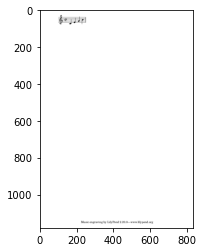

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('my_first_bar.png')
Generate
imgplot = plt.imshow(img)
plt.show()

Problem to brak programu  w colabie lilypond ale spokojnie jest do zrobienia.

mingus pozwala na generowanie z takiego ciagu zarowno midi jak i png.

python-ly pozwala generowac music-xml z LilyPond stringow

Wiec jesli zdecydujemy sie na zakres dzwiekow ktory chcemy miec w zbiorze moge zabrac sie za pisanie jakiegos generatora a potem "filtrow" na te png 

PRÓBAAAA

## Zabawy Janusza

In [188]:
import mingus.core.notes as notes
from mingus.containers import Note, NoteContainer, Bar, Track
import random

### Generowanie melodii

In [43]:
allNotesM = ["G-3", "A-3", "B-3", "C-4", "D-4","E-4", "F-4", "G-4", "A-4", "B-4", "C-5", "D-5", "E-5", "F-5", "G-5", "A-5", "B-5", "C-6" ]
lenAllNotesM = len(allNotesM)
largestInterval = 4

In [44]:
# jeśli before=-1 -> pierwsza nuta
def newNoteIndexM(before):
    if before==-1:
        return random.randint(0,lenAllNotesM-1)
    
    if before<largestInterval:
        return random.randint(0,largestInterval)
    
    if before>lenAllNotesM-largestInterval-1:
        return random.randint(lenAllNotesM-largestInterval, lenAllNotesM-1)
        
    return random.randint(before-largestInterval,before+largestInterval-1)

In [45]:
# dla length>0
def newNoteIndexListM(length):
    prev = newNoteIndexM(-1)
    melody = [prev]
    for i in range(1,length):
        prev = newNoteIndexM(prev)
        melody.append(prev)
    return melody

In [46]:
def newBarMelody(length):
    return [Note(allNotesM[a]) for a in newNoteIndexListM(length)]

In [47]:
newBarMelody(8)

['A-4', 'D-4', 'G-4', 'D-4', 'C-4', 'G-3', 'A-3', 'C-4']

### Generowanie rytmu

In [48]:
allNotesBeat = [0.5, 0.5, 1, 1, 1, 1, 2, 2, 4]
lenAllNotesBeat = len(allNotesBeat)

In [49]:
def newBarRhythm(beats):
    rhythm = []
    already=0
    
    while already < beats:
        last = 0
        isFound=False
        while not isFound:
            found = allNotesBeat[random.randint(last,lenAllNotesBeat-1)]
            if already+found<=beats:
                isFound = True
                already+=found
                rhythm.append(found)
    return rhythm

In [50]:
newBarRhythm(4)

[0.5, 0.5, 0.5, 1, 1, 0.5]

### Generowanie taktu

In [139]:
def GenerateBar(beats):
    b = Bar(meter=(beats,4))
    nc = NoteContainer()
    rhythm = newBarRhythm(beats)
    melody = newBarMelody(len(rhythm))
    for ii in range(0,len(rhythm)):
        b.place_notes(melody[ii], 4/rhythm[ii])
    
    return b

## Pozbycie sie "Clef" oraz "TimeSignature" z png

In [149]:
bar = GenerateBar(4)

In [150]:
type(bar)

mingus.containers.bar.Bar

In [151]:
bar

[[0.0, 4.0, ['C-5']], [0.25, 8.0, ['B-4']], [0.375, 8.0, ['A-4']], [0.5, 4.0, ['D-4']], [0.75, 4.0, ['E-4']]]

In [152]:
bar_string = LilyPond.from_Bar(bar)

In [153]:
bar_string

"{ \\time 4/4 \\key c \\major c''4 b'8 a'8 d'4 e'4 }"

In [154]:
delete_clef_string = " \n \override Staff.Clef.color = #white \n \override Staff.Clef.layer = #-1"
delete_time_string = " \n \override Staff.TimeSignature.color = #white \n \override Staff.TimeSignature.layer = #-1"  

In [155]:
bar_string = bar_string[0] + delete_clef_string + delete_time_string+ bar_string[1:]

In [156]:
bar_string

"{ \n \\override Staff.Clef.color = #white \n \\override Staff.Clef.layer = #-1 \n \\override Staff.TimeSignature.color = #white \n \\override Staff.TimeSignature.layer = #-1 \\time 4/4 \\key c \\major c''4 b'8 a'8 d'4 e'4 }"

In [157]:
LilyPond.to_png(bar_string, "my_first_bar") # it can here create png 

Executing: lilypond -fpng -o "my_first_bar" "my_first_bar.ly"


True

## Generating cropped png

In [174]:
import subprocess
import os

In [175]:
def GenerateCropped(ly_string, filename, command='-fpng'):
    """Generates cropped PNG it is slightly changed version of minugs save_string_and_execute_LilyPond function"""
    ly_string = '\\version "2.10.33"\n' + ly_string
    if filename[-4] in ['.pdf' or '.png']:
        filename = filename[:-4]
    try:
        f = open(filename + '.ly', 'w')
        f.write(ly_string)
        f.close()
    except:
        return False
    command = 'lilypond -dpreview %s -o "%s" "%s.ly"' % (command, filename, filename)
    print('Executing: %s' % command)
    p = subprocess.Popen(command, shell=True).wait()
    os.remove(filename + '.ly')
    return True

In [172]:
GenerateCropped(bar_string, "my_first_bar")

Executing: lilypond -dpreview -fpng -o "my_first_bar" "my_first_bar.ly"


True

In [216]:
from random import uniform, choices
def GenerateRandomTrack():
    line_len = int(uniform(3,8))
    meter = choices([3,4], [0.25,0.75])[0]
    track = Track()
    for i in range(line_len):
        track.add_bar(GenerateBar(meter))
    
    return track

In [217]:
t = GenerateRandomLine()
t.test_integrity()

True

In [218]:
t_string = LilyPond.from_Track(t)
t_string = t_string[0] + delete_clef_string + delete_time_string+ t_string[1:]
t_string

"{ \n \\override Staff.Clef.color = #white \n \\override Staff.Clef.layer = #-1 \n \\override Staff.TimeSignature.color = #white \n \\override Staff.TimeSignature.layer = #-1 { b''1 } { f''4 e''8 e''4 g''8 b''4 } { c'1 } { f'2 d'2 } { e'4 g'4 f'8 f'4 d'8 } { g4 c'8 a2 g8 } { b''8 a''4 b''2 a''8 } }"

In [219]:
GenerateCropped(t_string,"my_first_track")

Executing: lilypond -dpreview -fpng -o "my_first_track" "my_first_track.ly"


True